# GAMES. 

ЦЕЛЬ: выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Магазин «Стримчик», который продаёт по всему миру компьютерные игры, собрал из открытых источников исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы. Мне, как аналитику магазина, необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании на 2017 год. (мы как будто находимся в 2016))). План следующий:

1. Знакомство с данными и изучение общей информации

2. Предобработка данных

3. Исследовательский анализ данных

3.1. Потенциально прибыльные платформы

3.2. Потенциально прибыльные жанры

4. Портрет пользователя каждого региона

4.1. Платформы по регионам

4.2. Жанры по регионам

4.3. Влияние ли рейтинга ESRB на продажи в отдельном регионе

5. Проверка гипотез

6. Общий вывод


## Знакомство с данными и изучение общей информации.

In [1]:
#импортируем окружение
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head())
data.info()
data.describe().round(2)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Видим табличку с 16715 строками и 11 колонками.

В цели анализа указано "успешность игры". Исходя из табоички успешность будет складываться из продаж, оценки пользователей и оценки критиков. А факторы успешности - платформа, рейтинг(для кого игра) и жанр.

В колонках Name, Year_of_Release, Genre, Critic_Score, User_Score и  Rating не хватает данных.

Year_of_Release - почему-то float64. А User_Score и Rating имеют нехарактерный тип object. 

Видим, что первый год выпуска - 1980, крайний - 2016 (но мы помним, что по условиям задачи сейчас как будто 2017 год!))). Остальные значения пока ничего не говорят.

Для собственного удобства внесу сюда описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

In [3]:
#посмотрим типы рейтингов
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Надо выяснить, какие рейтинги бывают и как они расшифровываются. В описании данных этой информации нет, поэтому прибегаем к внешней "разведке"; выяснилось:

- (E) Everyone - контент подходит для всех возрастов. 1998–present
- (M) Mature 17+ - подходит для лиц в возрасте 17 лет и старше. 1994–present
- (T) Teen - для детей от 13 лет и старше. 1994–present
- (E10+) Everyone 10+ - для детей от 10 лет и старше. 2005–present
- (AO) Adults Only 18+ - подходит только для лиц старше 18 лет. 1994–present.
- (EC) Early Childhood - ориентированный на дошкольную аудиторию. 1994–2018 (для нашего датасета актуальный, мы же как будто в 2017)
- (RP) Rating Pending - рейтинг до сих пор не присвоен. 1994–present

Архивные рейтинги, не действующие сейчас:

-  (K–A) Kids to Adults - нравятся и детям, и взрослым. Этот рейтинг использовался с 1994 по 1998 год, прежде чем он был заменен рейтингом для всех (E). 

Печально, что есть значение nan. Псмотрим далее, что с этим делать.

Итак, посмотрели на таблицу, увидели пропуски, расшифровали рейтинги, приступаем к предобработке.

## Предобработка данных

В задании поставлены следующие задачи:

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили
тип данных и почему;
- Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или
почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой
пользователей. Отдельно разберите это значение и опишите, как его
обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный
столбец.

In [4]:
# приведём названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)
#проверим, всё ли получилось
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Так как мне нужно было все стобцы переименовать, я применила не rename, а такой вариант.

In [5]:
#посмотрим, сколько пропусков в year_of_release
display('пропусков в year_of_release:', data['year_of_release'].isna().sum())

#непонятно, что это за пропуски, их всего 269, удалим эти строки
data = data.dropna(subset=['year_of_release'])

#преобразуем year_of_release в целое число чисто из соображений перфекционизма
data['year_of_release'] = data['year_of_release'].astype(int)
display(data.head())
data.info()

'пропусков в year_of_release:'

269

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [6]:
#есть 2 игры без названия, присвоим ей имя No Name
data['name'] = data['name'].fillna('No Name')
#то же сделаем с жанром, присвоим 2 безжанровым играм имя No Genre
data['genre'] = data['genre'].fillna('No Genre')
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16446 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16446 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [7]:
#будем разбираться с critic_score, где всего 7983 значений
display(data['critic_score'].unique())
display('пропусков в critic_score:', data['critic_score'].isna().sum())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

'пропусков в critic_score:'

8463

Пропуски в critic_score заполнять не будем ничем, т.к., возможно, это игры без оценки критиков.

In [8]:
#будем разбираться с user_score
display(data['user_score'].unique())
display('пропусков в user_score:', data['user_score'].isna().sum())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'пропусков в user_score:'

6607

NAN оставим как есть, а значения TBD (to be determined) заменим на NAN, раз эта информация ещё решается.

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
#проверяем
display(data['user_score'].unique())
display('пропусков в user_score:', data['user_score'].isna().sum())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

'пропусков в user_score:'

8983

In [10]:
#поработаем со столбцом rating
display(data['rating'].unique())
display('пропусков в rating:', data['rating'].isna().sum())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

'пропусков в rating:'

6678

In [11]:
#аббревиатуры я расшифровала выше, nan заменим на "No Rating"
data['rating'] = data['rating'].fillna(value='No Rating')
display(data['rating'].unique())
display('пропусков в rating:', data['rating'].isna().sum())

array(['E', 'No Rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

'пропусков в rating:'

0

В столбце rating лучше всего заполнить пропуски заглушкой, потому что заполнение нулём или медианой исказит данные. Удаление тоже не вариант, т.к. игры без рейтинга тоже можно поанализировать. И , возможно, будет понятно, почему нет рейтинга.

Возможные причины появления таких значений - рейтинг архивный, автор игры решил не присваивать рейтинг, технические причины...

In [12]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No Rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No Rating,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
name               16446 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16446 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             16446 non-null object
total_sales        16446 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Итак,

- названия столбцов приведены в змеиный регистр,
- 269 строк с играми без указания года удалены,
- двум играм и двум жанрам были присвоены названия No Name и No Genre, соответственно,
- значения TBD (to be determined) заменены на NAN, 
- строки без рейтинга заменили на заглушку No Rating,
- посчитаны суммарные продажи во всех регионах путём их сложения и записаны в отдельный столбец.

## Исследовательский анализ данных

В задании поставлены следующие задачи:

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с
наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный
период определите самостоятельно в результате исследования предыдущих
вопросов. Основной фактор — эти данные помогут построить прогноз на 2017
год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите
несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по
платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Постройте диаграмму рассеяния и
посчитайте корреляцию между отзывами и продажами. Сформулируйте
выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о
самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими
продажами?

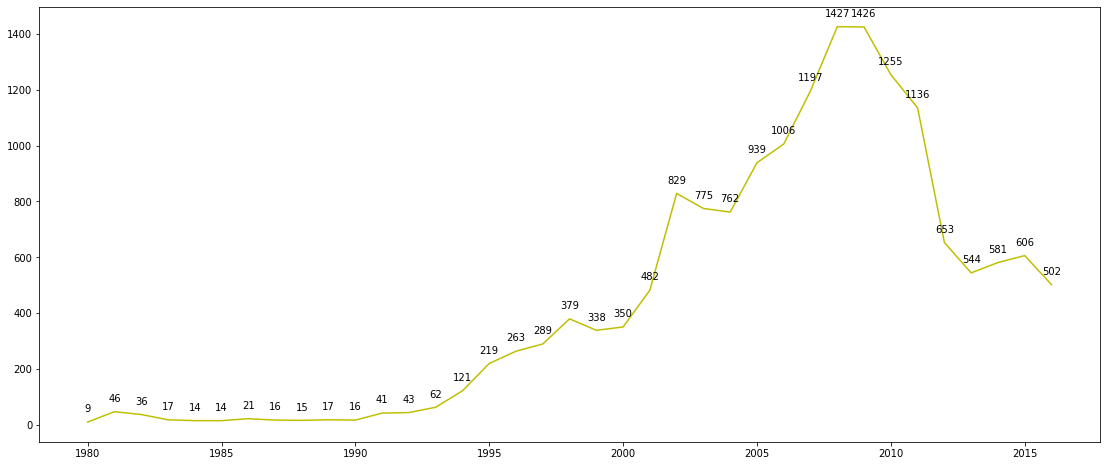

In [13]:
#посмотрим, сколько игр выпускалось в разные годы нескучным способом с подписью значений на графике))

from matplotlib.pyplot import figure
c = data.groupby('year_of_release')['year_of_release'].count()
ys = []
xs = []
inverse = [(key, value) for key, value in c.items()]


for key, value in c.items():
    ys.append(value)
    xs.append(key)

plt.figure(figsize=(19,8))

plt.plot(xs,ys,color='y')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()


In [14]:
#посмотрим, сколько игр выпускалось в разные годы
#data.groupby('year_of_release')['year_of_release'].count().plot()
#data.groupby('year_of_release')['year_of_release'].count()

На графике видно, что до начала 90-х игр выпускалось очень мало, и тренда на увеличение не было. В 1994 году произошёл резкий скачок почти в 2 раза, и цифра из двузначной превратилась в трёхзначную. В 2008 году было выпущено максимум компьютерных игр за историю человечества, после чего был драматический спад. В 2014-2015 - тренд на рост.

Для прогнозирования в 2017 году данные до 1993 года включительно не очень актуальны. Удалим эти строки.

In [15]:
data = data.query('year_of_release > 1993')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16714
Data columns (total 12 columns):
name               16079 non-null object
platform           16079 non-null object
year_of_release    16079 non-null int64
genre              16079 non-null object
na_sales           16079 non-null float64
eu_sales           16079 non-null float64
jp_sales           16079 non-null float64
other_sales        16079 non-null float64
critic_score       7980 non-null float64
user_score         7460 non-null object
rating             16079 non-null object
total_sales        16079 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Удалилось совсем мало строк, осталось 16079.


Перейдём к анализу того, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [16]:
#платформы с наибольшими суммарными продажами
top_10 = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales').tail(10).index
display(top_10)

Index(['3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

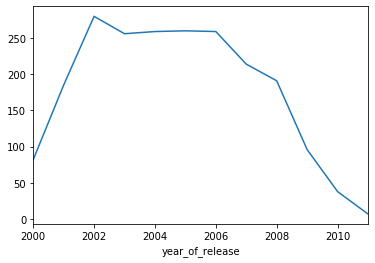

In [17]:
data.query('platform == "PS2"').groupby('year_of_release')['year_of_release'].count().plot()
#data.query('platform == "PS2"').describe().round(2)

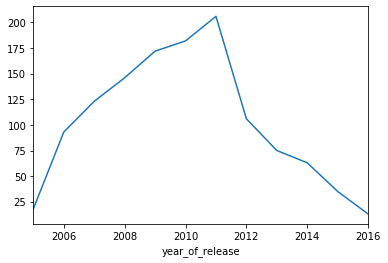

In [18]:
data.query('platform == "X360"').groupby('year_of_release')['year_of_release'].count().plot()

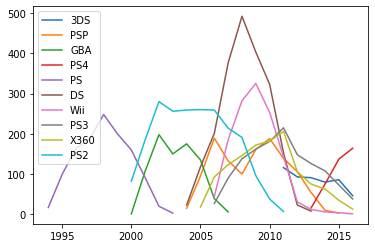

In [19]:
#скучно делать каждый график отдельно, сделаем топ-10 на одном
for platform in top_10:
  c = data.query('platform == @platform').groupby('year_of_release')['year_of_release'].count()
  plt.plot(c)
plt.legend(top_10)

Виден типичный жизненный цикл всего: старт, рост, зрелость, упадок. И примерно на середине цикла -упадок. Значит, половина жизненного цикла игр - это рост. 

7 из топ-10 сосредоточены в период 2005-2015. Видимо, это расцвет игровой индустрии.

In [20]:
#минимальные значимые продажи в миллионах
min_sales = 10
#суммарные продажи в год выше порога
report = data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).query('total_sales > @min_sales')
#среднее число лет выше порога продаж, деленное на 2
report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean() / 2

year_of_release    3.075
dtype: float64

В среднем жизненный цикл платформы - 6 лет, из которых 3 года она расцветает.

Чтобы построить прогноз на 2017 год, возьмем данные за 2014, 2015 и 2016 годы.

### Потенциально прибыльные платформы

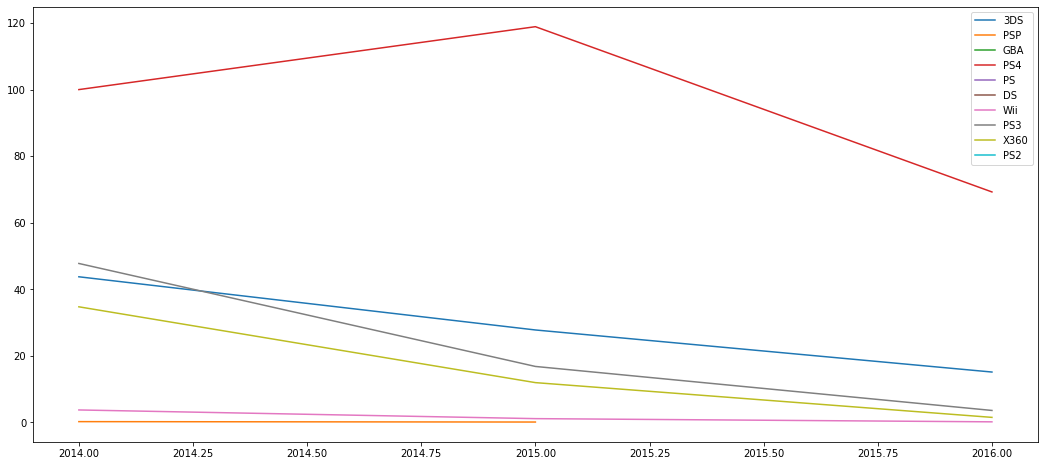

In [21]:
#Выберем несколько потенциально прибыльных платформ
plt.figure(figsize=(18,8))
for platform in top_10:
  c = data.query('platform == @platform and year_of_release>2013').groupby('year_of_release')['total_sales'].sum()
  plt.plot(c)
plt.legend(top_10)

Видим, что PS4 пока на высоте, но уже снижается. 3DS и PS3 плавно снижаются.

Text(0.5, 1.0, 'PS4')

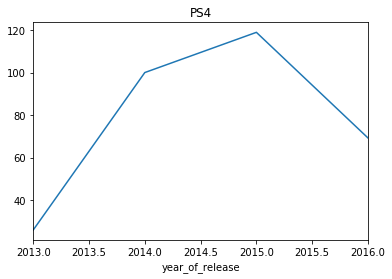

In [22]:
data.query('platform == "PS4" and year_of_release>2010').groupby('year_of_release')['total_sales'].sum().plot()
plt.title('PS4')

Да, PS4 недавно находилась на пике. Впереди предвидится спад. Но в краткосрочной перспективе её можно рассматривать.

Text(0.5, 1.0, 'X360')

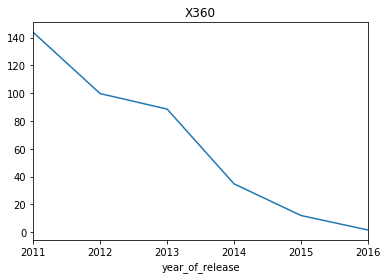

In [23]:
data.query('platform == "X360" and year_of_release>2010').groupby('year_of_release')['total_sales'].sum().plot()
plt.title('X360')

X360  - неподходящий вариант.

Text(0.5, 1.0, 'Wii')

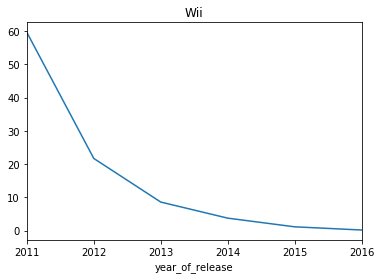

In [24]:
data.query('platform == "Wii" and year_of_release>2010').groupby('year_of_release')['total_sales'].sum().plot()
plt.title('Wii')

Wii тоже не вариант. 

Text(0.5, 1.0, '3DS')

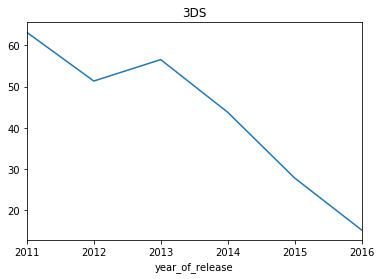

In [25]:
data.query('platform == "3DS" and year_of_release>2010').groupby('year_of_release')['total_sales'].sum().plot()
plt.title('3DS')

У 3DS есть ещё небольшой потенциал и есть куда падать))

Text(0.5, 1.0, 'PS3')

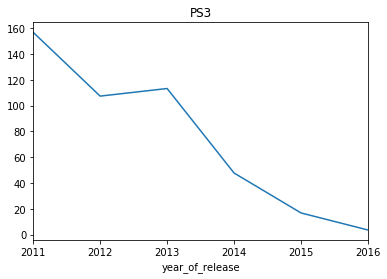

In [26]:
data.query('platform == "PS3" and year_of_release>2010').groupby('year_of_release')['total_sales'].sum().plot()
plt.title('PS3')

PS3 примерно в таком же состоянии как и 3DS.

Итак, берём в расчёт 3DS и , конечно же, PS4.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


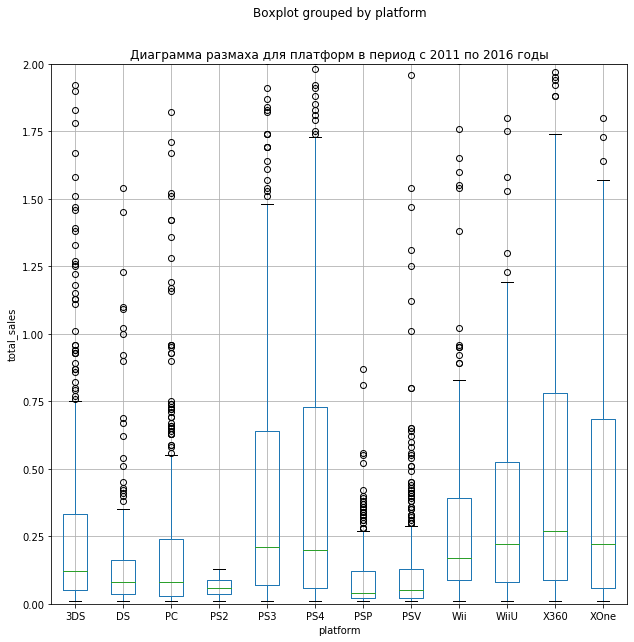

In [27]:
#Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам
data.query('year_of_release>2010').boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.ylim(0,2)
plt.xlabel('platform')
plt.ylabel('total_sales')
plt.title('Диаграмма размаха для платформ в период с 2011 по 2016 годы')
plt.show()

У PS4 и X360 самые высокие границы выбросов.

Самые высокие медианные значения у X360, Wii, WiU, PS4, PS3 и XOne.

Самые "жирные" с точки зрения выручки - PS3, PS3, X360, XOne.

'корреляция оценки критиков с продажами'

0.25

'корреляция оценки пользователей с продажами'

0.09

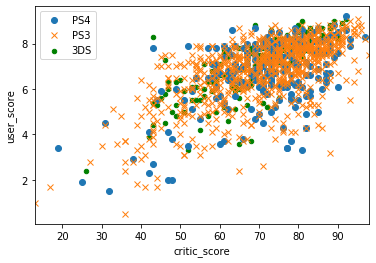

In [28]:
#оценим влияние отзывов пользователей и критиков на PS4, PS3, 3DS
#Построим диаграмму рассеяния
data['user_score'] = data['user_score'].astype(float)
ax = data.query('platform == "PS4"').plot(x='critic_score', y='user_score', style='o', label='PS4')
data.query('platform == "PS3"').plot(x='critic_score', y='user_score', style='x', ax=ax, label='PS3')
data.query('platform == "3DS"').plot(kind='scatter', x='critic_score', y='user_score', color='green', ax=ax, label='3DS')
plt.legend()

#посчитаем корреляцию между отзывами и продажами
display('корреляция оценки критиков с продажами', data['critic_score'].corr(data['total_sales']).round(2))
display('корреляция оценки пользователей с продажами', data['user_score'].corr(data['total_sales']).round(2))

На диаграмме рассеяния видим скопление точек справа вверху, что говорит о тесной взаимосвязи оценки критиков с оценками пользователей по всем трём платформам.

Корреляция оценки критиков с продажами = 0.25 (положительная, несильная, то есть чем выше оценки критиков, тем выше продажи, но это не очень сильная зависимость).

Корреляция оценки пользователей с продажами = 0.09 (тоже положительная, но близка к нулю).

Корреляция не означает каузацию, поэтому продавцы игр зарабатывают миллиарды особо не завися от оценок пользователей или критиков. Вернее, оценки пользователей и критиков не являются причиной сверхдоходов.

корр-я оценки критиков с продажами для PS4: 0.40656790206178095
корр-я оценки пользователей с продажами для PS4: -0.031957110204556424
корр-я оценки критиков с продажами для PS3: 0.4327589578997135
корр-я оценки пользователей с продажами для PS3: 0.12841562938563028
корр-я оценки критиков с продажами для 3DS: 0.3487397305984834
корр-я оценки пользователей с продажами для 3DS: 0.22207843643390882


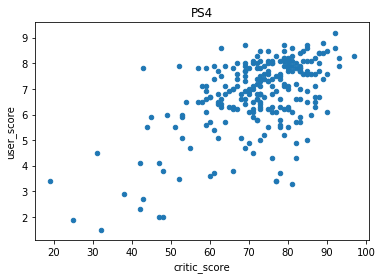

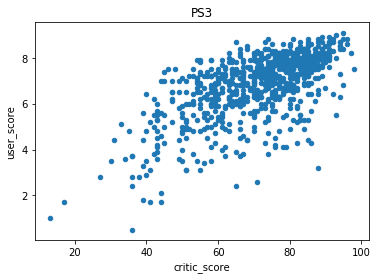

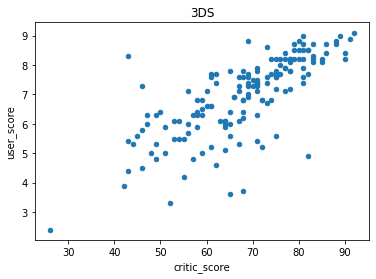

In [29]:
def ggg(platform_from_arr):
    data_corr = data.query(f'platform == "{platform_from_arr}"')
    data_corr.plot(x='critic_score', y='user_score', kind='scatter', title=platform_from_arr)
    m = f'корр-я оценки критиков с продажами для ' + str(platform_from_arr) + ': ' + str(data_corr['critic_score'].corr(data_corr['total_sales']))
    n = 'корр-я оценки пользователей с продажами для ' + str(platform_from_arr) + ': ' + str(data_corr['user_score'].corr(data_corr['total_sales']))
    print(str(m), n, sep='\n')

arr = ["PS4", "PS3", "3DS"]

for i in arr:
  ggg(i)

Оценки критиков более коррелируют с продажами, чем оценки пользователей.

### Потенциально прибыльные жанры

In [1]:
#посмотрим на общее распределение игр по жанрам

#data['genre'].hist(bins=30, figsize=(12,10))

#data_g = data.query('year_of_release>2013')
#data_g['genre'].hist(bins=30, figsize=(12,10))

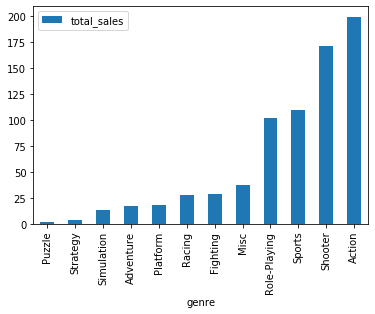

In [52]:
actual_data = data.query('year_of_release > 2013')
platform_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales')
platform_sales.plot(kind = 'bar')

Итак, в **исследовательском анализе** выяснилось:

- до 1994 года было выпущено мало игр, данные до 1994 года удалены, т.к. не представляют интереса для анализа. Максимальное количество игр за всю историю было в 2008 году;

- топ-10 игр по выручке - '3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2';

- в среднем жизненный цикл платформы - 6 лет, из которых 3 года она расцветает. Поэтому чтобы построить прогноз на 2017 год, берём данные за 2014, 2015 и 2016 годы;

- самые "жирные" с точки зрения выручки - PS3, PS3, X360, XOne, но их жизненный цикл закончен. В динамике наиболее перспективные платформы: 3DS, PS3 и , конечно же, PS4 (самая перспективная);

- Корреляция оценки критиков с продажами = 0.25. Корреляция оценки пользователей с продажами = 0.09. Оценки пользователей и критиков не являются причиной сверхдоходов;

- За весь период Action и Sport самые популярные. А за актуальный период - Action, Role-Playing, Adventure, Sports, Shooter and Misc. То есть произошло некое разнообразие жанров.

## Портрет пользователя каждого региона

В данном разделе определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишем различия в долях продаж.

- Самые популярные жанры (топ-5). Поясним разницу.

- Ответим на вопрос, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [31]:
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No Rating,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16714
Data columns (total 12 columns):
name               16079 non-null object
platform           16079 non-null object
year_of_release    16079 non-null int64
genre              16079 non-null object
na_sales           16079 non-null float64
eu_sales           16079 non-null float64
jp_sales           16079 non-null float64
other_sales        16079 non-null float64
critic_score       7980 non-null float64
user_score         7460 non-null float64
rating             16079 non-null object
total_sales        16079 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Платформы по регионам

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,12.33,3.51,16.39,34.75,0.0,1.98,1.59,10.50,20.25,30.97
2015,6.17,2.36,4.99,42.37,0.0,0.39,0.43,6.76,7.36,36.03
2016,4.14,1.36,0.67,21.49,NaN,0.15,0.06,2.10,0.69,14.27


'Самые популярные платформы в Северной Америке:'

Index(['PS3', '3DS', 'X360', 'XOne', 'PS4'], dtype='object', name='platform')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


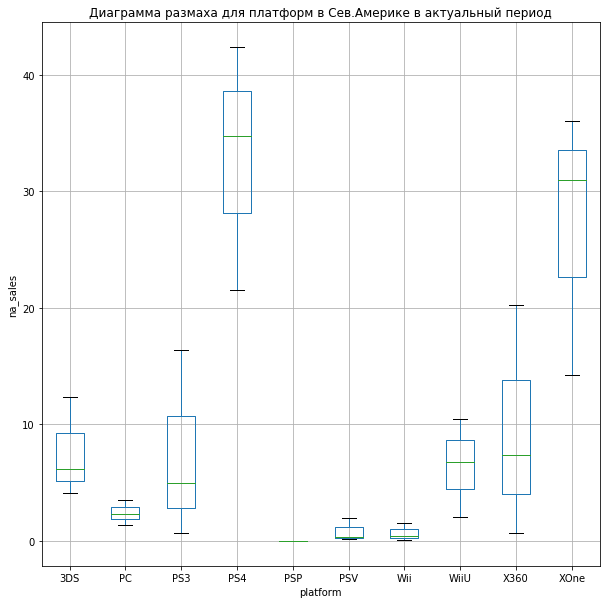

In [32]:
#посмотрим на продажи в Сев.Америке в актуальный период
data_NA = data.query('year_of_release>2013').pivot_table(index=['year_of_release'], columns='platform', values='na_sales', aggfunc='sum')
display(data_NA)

#посчитаем топ-5 платформ в Сев.Америке в актуальный период
top_5_NA = data.query('year_of_release>2013').groupby('platform').agg({'na_sales': 'sum'}).sort_values(by = 'na_sales').tail(5).index
display('Самые популярные платформы в Северной Америке:', top_5_NA)

#для бОльшей наглядности и информативности по медиане построим боксплот
data_NA.boxplot(figsize=(10,10))
plt.xlabel('platform')
plt.ylabel('na_sales')
plt.title('Диаграмма размаха для платформ в Сев.Америке в актуальный период')
plt.show()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,8.73,8.87,18.24,46.50,0.0,2.45,1.86,6.66,11.28,18.15
2015,5.06,5.57,6.04,51.76,0.0,0.69,0.62,5.01,3.50,18.47
2016,2.33,3.53,1.26,31.78,NaN,0.39,0.11,1.48,0.71,9.63


'Самые популярные платформы в Европе:'

Index(['3DS', 'PC', 'PS3', 'XOne', 'PS4'], dtype='object', name='platform')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


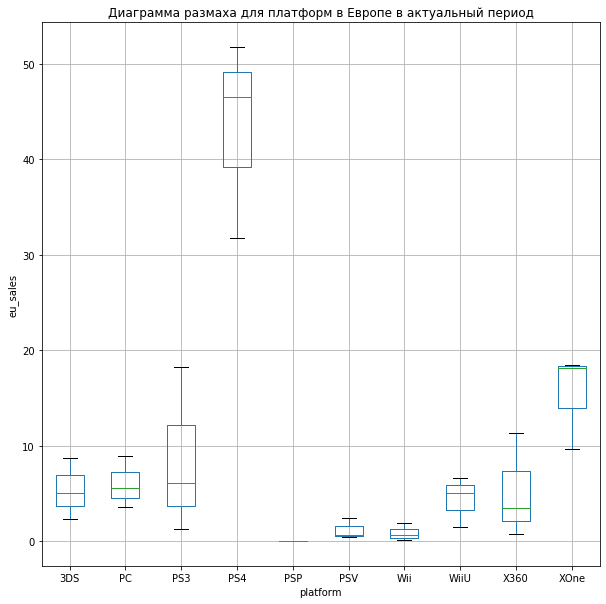

In [33]:
#посмотрим на продажи в Европе в актуальный период
data_EU = data.query('year_of_release>2013').pivot_table(index=['year_of_release'], columns='platform', values='eu_sales', aggfunc='sum')
display(data_EU)

#посчитаем топ-5 платформ в Европе в актуальный период
top_5_EU = data.query('year_of_release>2013').groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by = 'eu_sales').tail(5).index
display('Самые популярные платформы в Европе:', top_5_EU)

#для бОльшей наглядности и информативности по медиане построим боксплот
data_EU.boxplot(figsize=(10,10))
plt.xlabel('platform')
plt.ylabel('eu_sales')
plt.title('Диаграмма размаха для платформ в Европе в актуальный период')
plt.show()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,20.69,0.0,6.25,2.97,0.24,6.13,0.0,3.19,0.08,0.14
2015,15.52,0.0,3.67,6.31,0.12,4.85,0.0,3.45,0.00,0.17
2016,8.03,0.0,1.30,5.74,NaN,3.56,0.0,0.67,0.00,0.01


'Самые популярные платформы в Японии:'

Index(['WiiU', 'PS3', 'PSV', 'PS4', '3DS'], dtype='object', name='platform')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


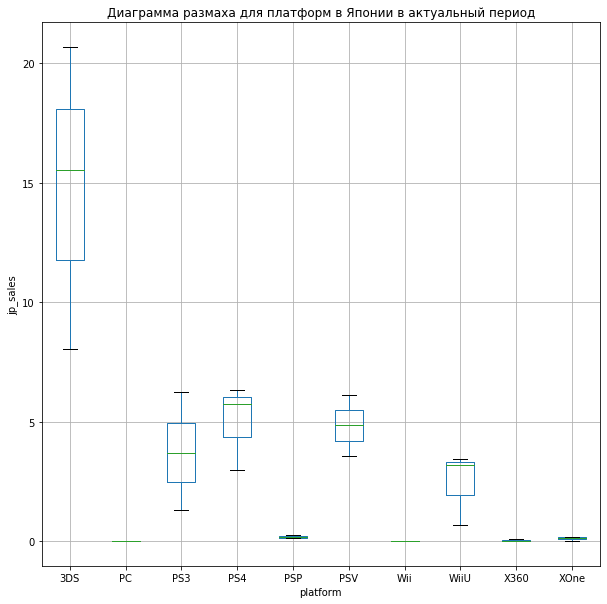

In [34]:
#посмотрим на продажи в Японии в актуальный период
data_JP = data.query('year_of_release>2013').pivot_table(index=['year_of_release'], columns='platform', values='jp_sales', aggfunc='sum')
display(data_JP)

#посчитаем топ-5 платформ в Японии в актуальный период
top_5_JP = data.query('year_of_release>2013').groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by = 'jp_sales').tail(5).index
display('Самые популярные платформы в Японии:', top_5_JP)

#для бОльшей наглядности и информативности по медиане построим боксплот
data_JP.boxplot(figsize=(10,10))
plt.xlabel('platform')
plt.ylabel('jp_sales')
plt.title('Диаграмма размаха для платформ в Японии в актуальный период')
plt.show()

Самые популярные платформы в Северной Америке: 'PS3', '3DS', 'X360', 'XOne', 'PS4'.

Самые популярные платформы в Европе: '3DS', 'PC', 'PS3', 'XOne', 'PS4'.

Самые популярные платформы в Японии: 'WiiU', 'PS3', 'PSV', 'PS4', '3DS'.

PS4 - лидер на североамериканском и европейском рынках (его ящик с усами улетел далеко ввысь к 40-50 млн проданных копий), на втором месте XOne. А японцы любят 3DS. Различия в продажах связаны, в первую очередь, с огромной разницей в численности населения между регионами. А во-вторых, возможно, с тем, что японцы предпочитают портативные варианты игр, какой является 3DS, в отличие от американцев и европейцев, которым нужен полный формат.

In [35]:
#sns.barplot(data=top_5_NA, x='platform', y='na_sales', label='na_sales', ax = ax1)
#sns.barplot(data=top_5_EU, x='platform', y='eu_sales', label='eu_sales', ax = ax2)
#sns.barplot(data=top_5_JP, x='platform', y='jp_sales', label='jp_sales', ax = ax3)

### Жанры по регионам

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,38.85,1.80,6.89,9.47,3.01,0.59,5.92,13.65,30.84,1.27,19.82,0.16
2015,24.39,2.89,3.70,4.82,2.49,0.06,2.09,13.93,31.94,1.20,18.77,0.58
2016,9.29,0.95,1.84,0.76,1.29,0.00,0.73,5.89,16.24,0.16,7.54,0.24


'Самые популярные жанры в Северной Америке:'

Index(['Misc', 'Role-Playing', 'Sports', 'Action', 'Shooter'], dtype='object', name='genre')

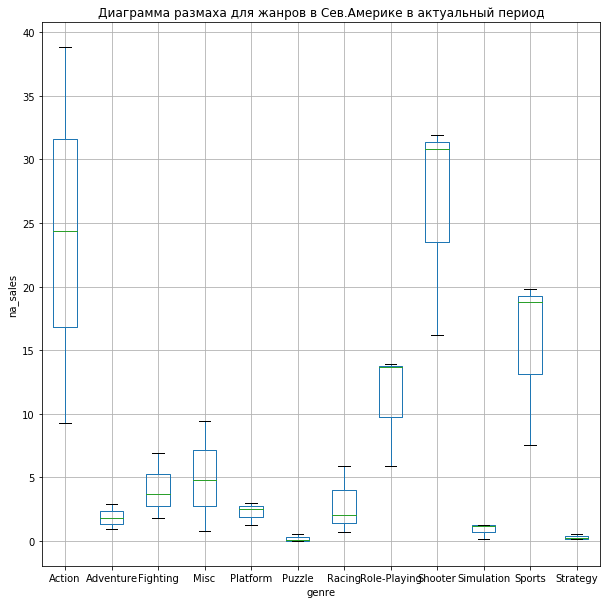

In [36]:
#посмотрим на популярные жанры в Сев.Америке в актуальный период
genre_NA = data.query('year_of_release>2013').pivot_table(index=['year_of_release'], columns='genre', values='na_sales', aggfunc='sum')
display(genre_NA)

#посчитаем топ-5 жанров в Сев.Америке в актуальный период
top_5_genre_NA = data.query('year_of_release>2013').groupby('genre').agg({'na_sales': 'sum'}).sort_values(by = 'na_sales').tail(5).index
display('Самые популярные жанры в Северной Америке:', top_5_genre_NA)

#для бОльшей наглядности и информативности по медиане построим боксплот
genre_NA.boxplot(figsize=(10,10))
plt.xlabel('genre')
plt.ylabel('na_sales')
plt.title('Диаграмма размаха для жанров в Сев.Америке в актуальный период')
plt.show()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,39.86,1.82,2.97,8.60,3.60,0.39,7.61,10.96,25.24,3.56,17.91,0.22
2015,24.14,3.35,2.38,3.60,1.81,0.12,4.75,12.93,24.38,2.47,15.81,0.98
2016,10.68,1.32,1.34,0.66,1.39,0.01,1.77,4.28,15.90,1.27,12.01,0.59


'Самые популярные жанры в Европе:'

Index(['Racing', 'Role-Playing', 'Sports', 'Shooter', 'Action'], dtype='object', name='genre')

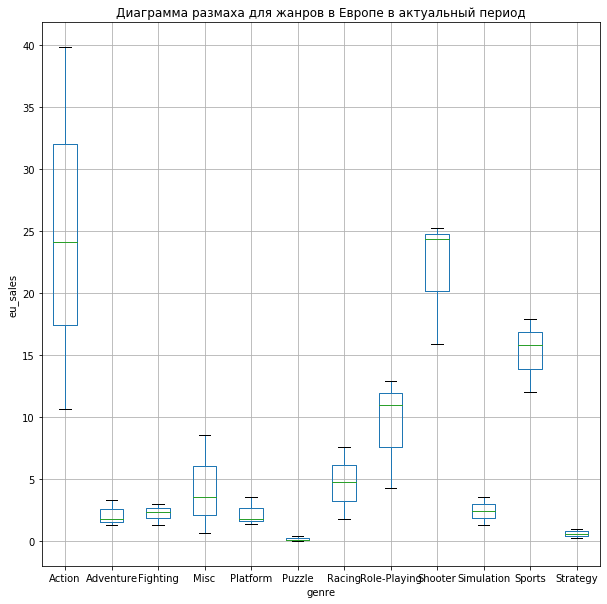

In [37]:
#посмотрим на популярные жанры в Европе в актуальный период
genre_EU = data.query('year_of_release>2013').pivot_table(index=['year_of_release'], columns='genre', values='eu_sales', aggfunc='sum')
display(genre_EU)

#посчитаем топ-5 жанров в Сев.Америке в актуальный период
top_5_genre_EU = data.query('year_of_release>2013').groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by = 'eu_sales').tail(5).index
display('Самые популярные жанры в Европе:', top_5_genre_EU)

#для бОльшей наглядности и информативности по медиане построим боксплот
genre_EU.boxplot(figsize=(10,10))
plt.xlabel('genre')
plt.ylabel('eu_sales')
plt.title('Диаграмма размаха для жанров в Европе в актуальный период')
plt.show()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,6.53,1.38,4.83,2.42,1.27,0.41,1.47,17.75,1.08,0.38,1.61,0.56
2015,15.98,1.04,0.79,2.15,1.31,0.52,0.28,6.80,2.73,1.60,0.73,0.16
2016,7.07,1.18,0.75,1.04,0.11,0.00,0.01,6.61,1.06,0.33,0.92,0.23


'Самые популярные жанры в Японии:'

Index(['Shooter', 'Misc', 'Fighting', 'Action', 'Role-Playing'], dtype='object', name='genre')

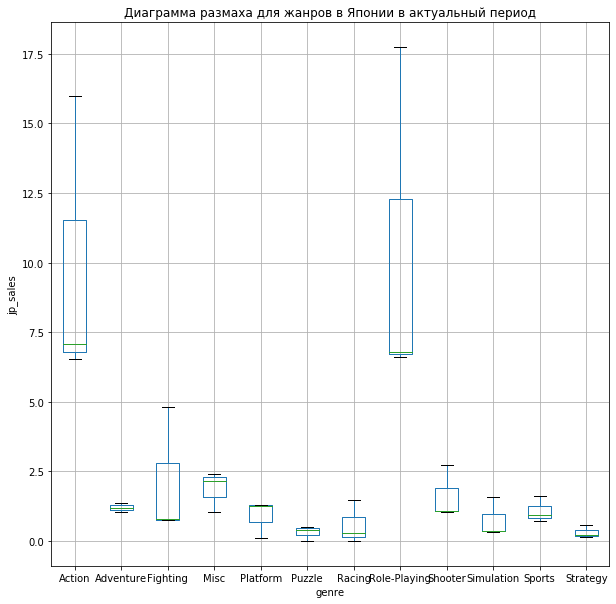

In [38]:
#посмотрим на популярные жанры в Японии в актуальный период
genre_JP = data.query('year_of_release>2013').pivot_table(index=['year_of_release'], columns='genre', values='jp_sales', aggfunc='sum')
display(genre_JP)

#посчитаем топ-5 жанров в Японии в актуальный период
top_5_genre_EU = data.query('year_of_release>2013').groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by = 'jp_sales').tail(5).index
display('Самые популярные жанры в Японии:', top_5_genre_EU)

#для бОльшей наглядности и информативности по медиане построим боксплот
genre_JP.boxplot(figsize=(10,10))
plt.xlabel('genre')
plt.ylabel('jp_sales')
plt.title('Диаграмма размаха для жанров в Японии в актуальный период')
plt.show()

Самые популярные жанры в Северной Америке: 'Misc', 'Role-Playing', 'Sports', 'Action', 'Shooter'.

Самые популярные жанры в Европе: 'Racing', 'Role-Playing', 'Sports', 'Shooter', 'Action'.

Самые популярные жанры в Японии: 'Shooter', 'Misc', 'Fighting', 'Action', 'Role-Playing'.

Sports', 'Action', 'Shooter' - преобладают в Европе и Сев.Америке. А Япония снова отличается в предпочтениях: у них самый популярный жанр Role-Playing. Полагаю, что разница связана с различием в менталитете, традициях, структуре населения.

### Влияние ли рейтинга ESRB на продажи в отдельном регионе

,total_sales
rating,
AO,1.960
E,0.200
E10+,0.205
EC,0.220
K-A,1.910
M,0.310
No Rating,0.100
RP,0.040
T,0.200


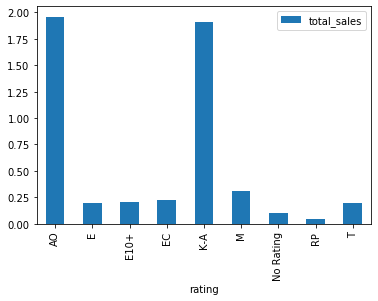

In [39]:
#сначала посмотрим в целом на рейтинги по всему датасету за период с 1994 по 2016
report = data.groupby('rating').agg({'total_sales': 'median'})
display(report)
report.plot(kind = 'bar')

(AO) Adults Only 18+ - имеет наибольшие продажи за период с 1994 по 2016 годы.

Также (K–A) Kids to Adults - нравятся и детям, и взрослым. Этот рейтинг использовался с 1994 по 1998 год, прежде чем он был заменен рейтингом для всех (E).

,na_sales
rating,
E,0.05
E10+,0.10
M,0.12
No Rating,0.00
T,0.03


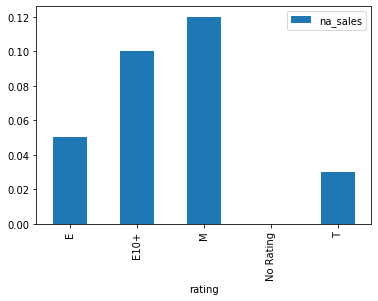

In [40]:
#теперь посмотрим на рейтинги по Сев.Америке за период с 2014 по 2016
report_NA = data.query('year_of_release>2013').groupby('rating').agg({'na_sales': 'median'})
display(report_NA)
report_NA.plot(kind = 'bar')

Наиболее популярны игры для (M) Mature 17+ - подходит для лиц в возрасте 17 лет и старше. Также (E10+) Everyone 10+ - для детей от 10 лет и старше.

,eu_sales
rating,
E,0.05
E10+,0.09
M,0.12
No Rating,0.00
T,0.04


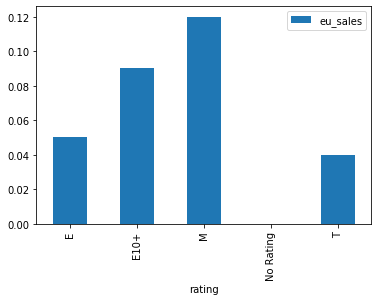

In [41]:
#теперь посмотрим на рейтинги по Европе за период с 2014 по 2016
report_EU = data.query('year_of_release>2013').groupby('rating').agg({'eu_sales': 'median'})
display(report_EU)
report_EU.plot(kind = 'bar')

В Европе картина схожа с североамериканской.

,jp_sales
rating,
E,0.00
E10+,0.00
M,0.00
No Rating,0.02
T,0.01


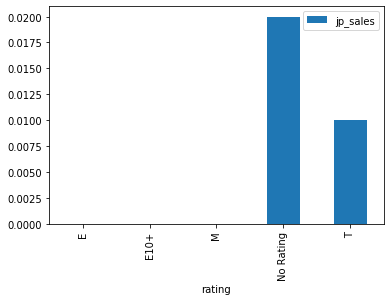

In [42]:
#теперь посмотрим на рейтинги по Японии за период с 2014 по 2016
report_JP = data.query('year_of_release>2013').groupby('rating').agg({'jp_sales': 'median'})
display(report_JP)
report_JP.plot(kind = 'bar')

По Японии медианные продажи очень низкие. Плюс то, что много игр падают в No Rating намекает на то, что, возможно, у японцев есть какая-то своя система рейтингов. Также видим, что  известный нам рейтинг (T) Teen - для детей от 13 лет и старше - популярен в Японии.

Таким образом, рейтинг влияет на продажи. По Европе и Сев.Америке одинаково популярны игры с рейтингом (M) и (E10+). Полагаю, что и в Японии примерно то же самое. Взрослая и платёжеспособная аудитория - таргет для производителей игр.

## Проверка гипотез

Будем проверять такие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

Также будет пояснено, как сформулирована нулевая и альтернативная гипотезы и
какой критерий применён для проверки гипотез и почему.

Нулевая гипотеза всегда строится для условиях равенства. Поэтому:

 **Н0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

 **Н1**: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Будет использован критерий alpha = 0,05, это общепринятое пороговое значение, будем использовать его.

In [43]:
#data.info()
#сформируем соответствующий срез
pc_user_score = data.query('year_of_release>2013')[data['platform'] == 'PC']
xone_user_score = data.query('year_of_release>2013')[data['platform'] == 'XOne']

#display(pc_user_score.isna().sum())
#display(xone_user_score.isna().sum())

#удалим NAN
pc_user_score = pc_user_score.dropna(subset=['critic_score', 'user_score'])
xone_user_score = xone_user_score.dropna(subset=['critic_score', 'user_score'])

#display(pc_user_score.isna().sum())
#display(xone_user_score.isna().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [44]:
alpha = 0.05

results = st.ttest_ind(
    pc_user_score['user_score'], 
    xone_user_score['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.1403785186826978
Не получилось отвергнуть нулевую гипотезу


p-значение меньше критического уровня стат.значимости , значит *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*.

In [45]:
#посмотрим на средние значения
display('Средний пользовательский рейтинг Xbox One в актуальный период:', data.query('platform == "XOne" and year_of_release>2013')['user_score'].mean())
display('Средний пользовательский рейтинг PC в актуальный период:', data.query('platform == "PC" and year_of_release>2013')['user_score'].mean())

'Средний пользовательский рейтинг Xbox One в актуальный период:'

6.594545454545454

'Средний пользовательский рейтинг PC в актуальный период:'

6.298360655737704

Почти одинаковый.

Далее проверим:

**Н0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые

**Н1**: Средние пользовательские рейтинги жанров Action и Sports разные.

In [46]:
#сформируем соответствующий срез
action_user_score = data.query('year_of_release>2013')[data['genre'] == 'Action']
sports_user_score = data.query('year_of_release>2013')[data['genre'] == 'Sports']

#удалим NAN
action_user_score = action_user_score.dropna(subset=['user_score'])
sports_user_score = sports_user_score.dropna(subset=['user_score'])

#display(action_user_score.isna().sum())
#display(sports_user_score.isna().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
alpha = 0.05

results = st.ttest_ind(
    action_user_score['user_score'], 
    sports_user_score['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


Значит, Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [48]:
#посмотрим на средние значения
display('Средний пользовательский рейтинг Action в актуальный период:', data.query('genre == "Action" and year_of_release>2013')['user_score'].mean())
display('Средний пользовательский рейтинг Sports в актуальный период:', data.query('genre == "Sports" and year_of_release>2013')['user_score'].mean())

'Средний пользовательский рейтинг Action в актуальный период:'

6.760606060606061

'Средний пользовательский рейтинг Sports в актуальный период:'

5.225196850393701

Таким образом, средние пользовательские рейтинги жанров Action и Sports: 6.7 и 5.2 соответственно. Отличаются.

## Общий вывод

Итак, был изучен датафрейм, состоящий из 16715 строк и 11 колонок, содержащий в себе информацию об играх с 1980 по 2016 год. Данные имели региональную характеристику, количественные оценки критиков и пользователей, уровень продаж, присвоенный рейтинг, жанр и дату выпуска.

В качестве **предобработки** данных было проведено:

- названия столбцов приведены в змеиный регистр,
- 269 строк с играми без указания года удалены,
- двум играм и двум жанрам были присвоены названия No Name и No Genre, соответственно,
- значения TBD (to be determined) заменены на NAN,
- строки без рейтинга заменили на заглушку No Rating,
посчитаны суммарные продажи во всех регионах путём их сложения и записаны в отдельный столбец.

В **исследовательском анализе** выяснилось:

- до 1994 года было выпущено мало игр, данные до 1994 года удалены, т.к. не представляют интереса для анализа. Максимальное количество игр за всю историю было в 2008 году;

- топ-10 игр по выручке - '3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2';

- в среднем жизненный цикл платформы - 6 лет, из которых 3 года она расцветает. Поэтому чтобы построить прогноз на 2017 год, берём данные за 2014, 2015 и 2016 годы;

- самые "жирные" с точки зрения выручки - PS3, PS3, X360, XOne, но их жизненный цикл закончен. В динамике наиболее перспективные платформы: 3DS, PS3 и , конечно же, PS4 (самая перспективная);

- Корреляция оценки критиков с продажами = 0.25. Корреляция оценки пользователей с продажами = 0.09. Оценки пользователей и критиков не являются причиной сверхдоходов;

- За весь период Action и Sport самые популярные. А за актуальный период - Action, Role-Playing, Adventure, Sports, Shooter and Misc. То есть произошло некое разнообразие жанров.

Далее был создан **портрет пользователя** каждого региона.

**Платформы**

Самые популярные платформы в Северной Америке: 'PS3', '3DS', 'X360', 'XOne', 'PS4'.

Самые популярные платформы в Европе: '3DS', 'PC', 'PS3', 'XOne', 'PS4'.

Самые популярные платформы в Японии: 'WiiU', 'PS3', 'PSV', 'PS4', '3DS'.

PS4 - лидер на североамериканском и европейском рынках (его ящик с усами улетел далеко ввысь к 40-50 млн проданных копий), на втором месте XOne. А японцы любят 3DS. Различия в продажах связаны, в первую очередь, с огромной разницей в численности населения между регионами. А во-вторых, возможно, с тем, что японцы предпочитают портативные варианты игр, какой является 3DS, в отличие от американцев и европейцев, которым нужен полный формат.

**Жанры**

Самые популярные жанры в Северной Америке: 'Misc', 'Role-Playing', 'Sports', 'Action', 'Shooter'.

Самые популярные жанры в Европе: 'Racing', 'Role-Playing', 'Sports', 'Shooter', 'Action'.

Самые популярные жанры в Японии: 'Shooter', 'Misc', 'Fighting', 'Action', 'Role-Playing'.

Sports', 'Action', 'Shooter' - преобладают в Европе и Сев.Америке. А Япония снова отличается в предпочтениях: у них самый популярный жанр Role-Playing. Полагаю, что разница связана с различием в менталитете, традициях, структуре населения.

Выяснилось, что **рейтинг** влияет на продажи. По Европе и Сев.Америке одинаково популярны игры с рейтингом (M) и (E10+). Полагаю, что и в Японии примерно то же самое. Взрослая и платёжеспособная аудитория - таргет для производителей игр.

При проверке **гипотез** стало ясно, что:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports отличаются..